<a href="https://colab.research.google.com/github/venkateshchandle/ml/blob/main/1BM22CS325_Lab_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pandas scikit-learn

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
iris_data = pd.read_csv('/content/iris.csv')

In [17]:
X_iris = iris_data.drop('species', axis=1)  # Assuming 'species' is the target column
y_iris = iris_data['species']

# Split data into training and testing sets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

# Create and train the KNN classifier (using k=5 as an example)
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_iris_train, y_iris_train)

# Make predictions on the test set
y_iris_pred = knn_iris.predict(X_iris_test)

# Evaluate the model
iris_accuracy = accuracy_score(y_iris_test, y_iris_pred)
iris_conf_matrix = confusion_matrix(y_iris_test, y_iris_pred)
iris_class_report = classification_report(y_iris_test, y_iris_pred)

# Print the results
print("Iris Dataset - KNN Classifier Results:")
print("Accuracy:", iris_accuracy)
print("Confusion Matrix:\n", iris_conf_matrix)
print("Classification Report:\n", iris_class_report)


Iris Dataset - KNN Classifier Results:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Diabetes dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

# Separate features (X) and target (y)
X_diabetes = diabetes_data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target column
y_diabetes = diabetes_data['Outcome']

# Split data into training and testing sets
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_diabetes_train = scaler.fit_transform(X_diabetes_train)
X_diabetes_test = scaler.transform(X_diabetes_test)

# Create and train the KNN classifier (using k=5 as an example)
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_diabetes_train, y_diabetes_train)

# Make predictions on the test set
y_diabetes_pred = knn_diabetes.predict(X_diabetes_test)

# Evaluate the model
diabetes_accuracy = accuracy_score(y_diabetes_test, y_diabetes_pred)
diabetes_conf_matrix = confusion_matrix(y_diabetes_test, y_diabetes_pred)

# Print the results
print("\nDiabetes Dataset - KNN Classifier Results:")
print("Accuracy:", diabetes_accuracy)
print("Confusion Matrix:\n", diabetes_conf_matrix)


Diabetes Dataset - KNN Classifier Results:
Accuracy: 0.6948051948051948
Confusion Matrix:
 [[79 20]
 [27 28]]


Optimal k value: 11
Accuracy: 0.7540983606557377
Confusion Matrix:
 [[20  9]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



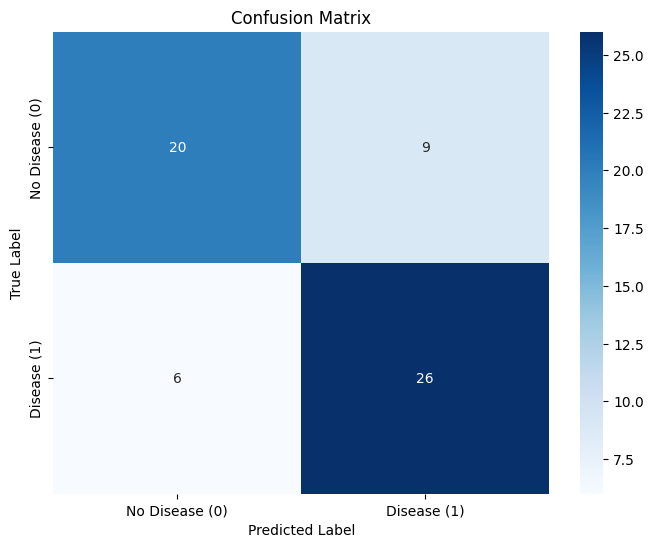

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the heart disease dataset
heart_data = pd.read_csv('/content/heart.csv')

# Separate features (X) and target (y)
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find optimal k value
k_values = list(range(1, 31))  # Try k values from 1 to 30
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Get the optimal k value
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Optimal k value:", optimal_k)

# Train the model with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_optimal.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot classification report (using text display)
print("Classification Report:")
print(class_report)